In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [16]:
ms= pd.read_csv('2.csv')

In [17]:
ms.apply(lambda x: sum(x.isnull()))

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [18]:
ms.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
ms.iloc[:,0]

0        1
1        2
2        3
3        4
4        5
5        6
6        7
7        8
8        9
9       10
10      11
11      12
12      13
13      14
14      15
15      16
16      17
17      18
18      19
19      20
20      21
21      22
22      23
23      24
24      25
25      26
26      27
27      28
28      29
29      30
      ... 
470    471
471    472
472    473
473    474
474    475
475    476
476    477
477    478
478    479
479    480
480    481
481    482
482    483
483    484
484    485
485    486
486    487
487    488
488    489
489    490
490    491
491    492
492    493
493    494
494    495
495    496
496    497
497    498
498    499
499    500
Name: Serial No., Length: 500, dtype: int64

In [19]:
ms.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [20]:
ms.groupby('University Rating').mean()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,281.558824,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,249.555556,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,247.574074,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,275.809524,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,207.753425,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


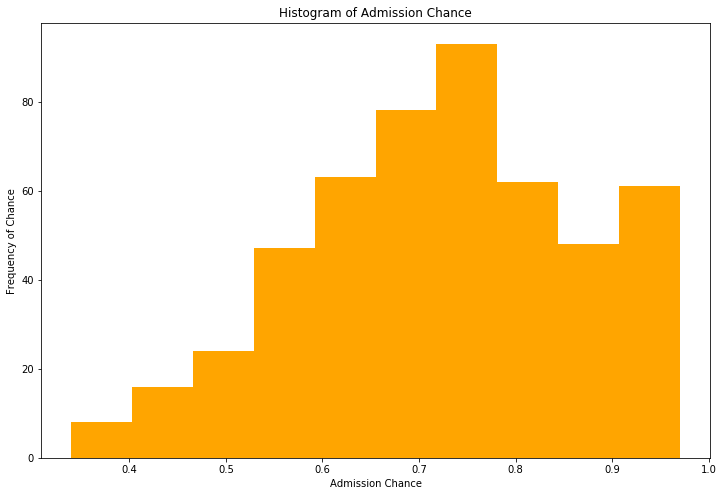

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(ms['Chance of Admit'],bins=10,color="orange")
plt.title('Histogram of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency of Chance')
plt.show()

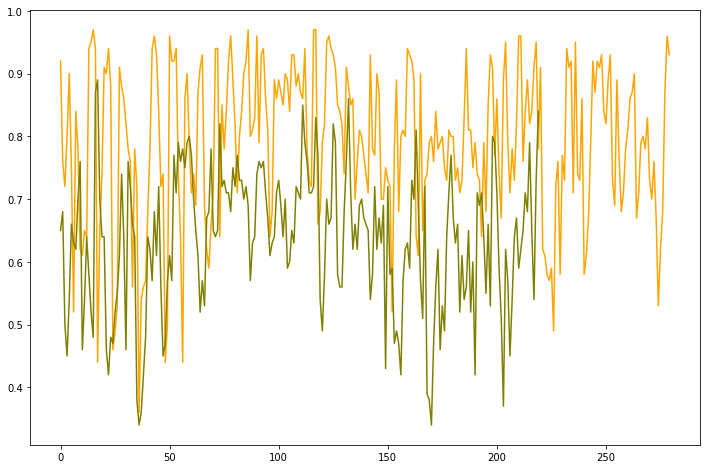

In [22]:
plt.figure(figsize=(12,8))
plt.plot(range(len(ms[ms['Research']==1])), ms[ms['Research']==1]['Chance of Admit'], color='orange')
plt.plot(range(len(ms[ms['Research']==0])), ms[ms['Research']==0]['Chance of Admit'], color='olive')
plt.show()

In [23]:
ms[ms['Chance of Admit']>0.82].groupby('Chance of Admit').mean()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Chance of Admit,,,,,,,,
0.83,309.000000,326.500000,112.750000,3.750000,3.875000,3.750000,9.032500,0.750000
0.84,255.636364,323.909091,109.636364,3.454545,3.818182,3.772727,9.032727,0.909091
0.85,229.000000,322.000000,111.500000,3.666667,4.083333,4.166667,9.041667,0.833333
0.86,246.900000,325.400000,114.400000,4.200000,4.300000,4.300000,9.124000,0.900000
0.87,273.750000,325.625000,111.125000,4.625000,4.375000,4.187500,9.101250,0.875000
0.88,127.000000,323.000000,110.750000,5.000000,4.875000,4.500000,9.152500,1.000000
0.89,269.000000,328.636364,113.545455,4.363636,4.318182,4.136364,9.270909,0.909091
0.90,186.777778,330.555556,116.111111,4.000000,4.500000,4.111111,9.324444,1.000000
0.91,267.400000,330.500000,115.000000,4.500000,4.250000,4.450000,9.328000,1.000000


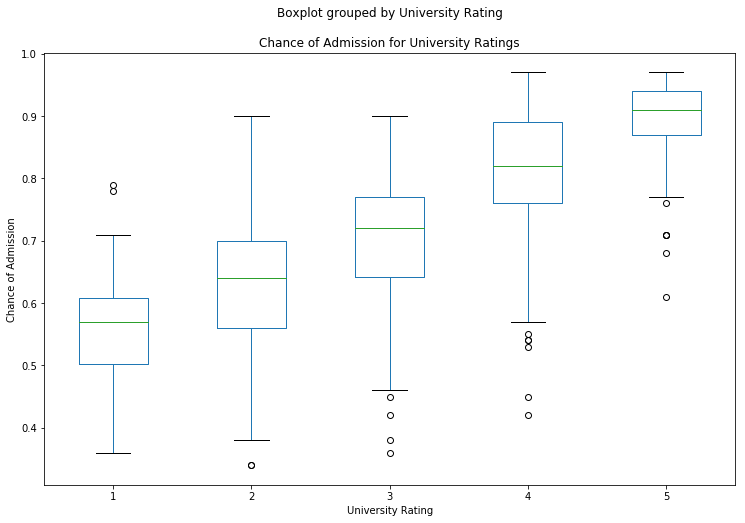

In [24]:
ms.boxplot(column='Chance of Admit',by='University Rating',grid=False,figsize=(12,8))
plt.title('Chance of Admission for University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

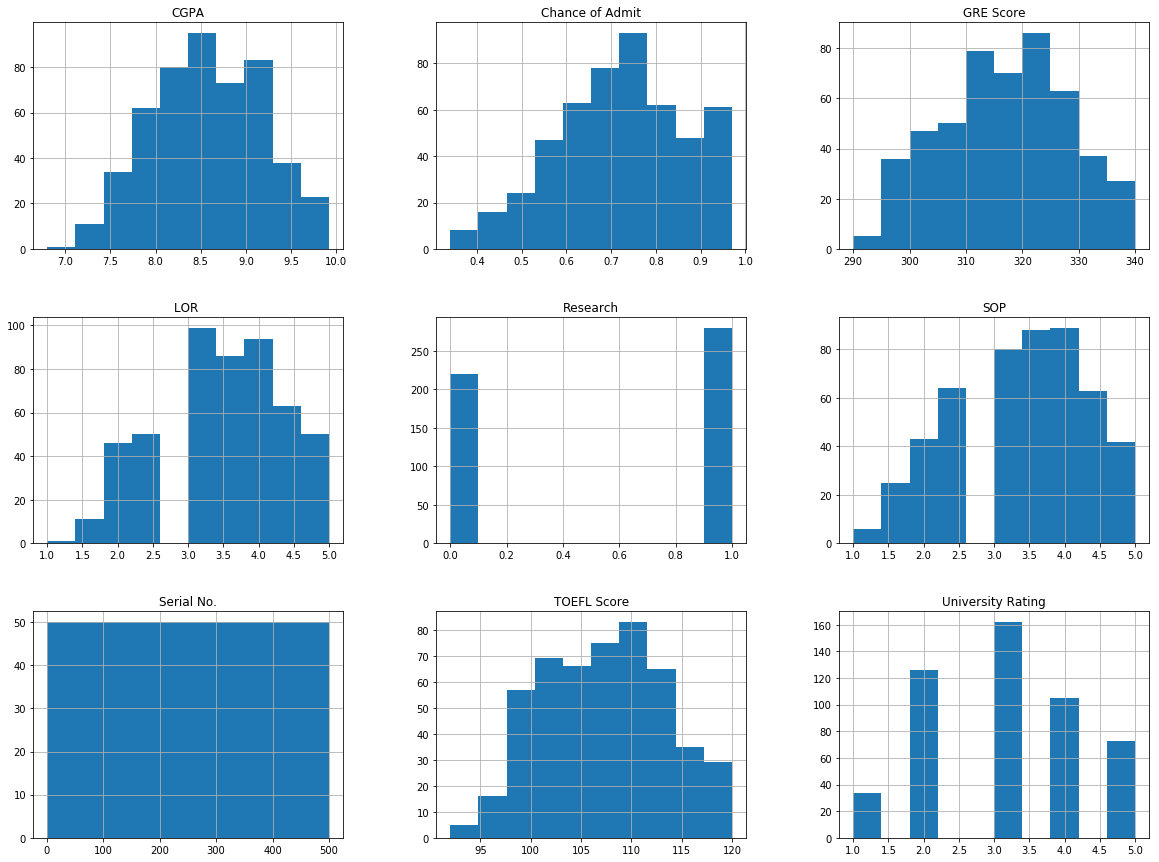

In [25]:
ms.hist(bins=10, figsize=(20,15))
plt.show()

In [26]:
print(ms.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [28]:
var=ms.columns.values.tolist()
y=ms['Chance of Admit']
x=[i for i in var if i not in ['Chance of Admit']]
x=ms[x]

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [30]:
cy_train=[1 if chance > 0.82 else 0 for chance in y_train]
cy_train=np.array(cy_train)

cy_test=[1 if chance > 0.82 else 0 for chance in y_test]
cy_test=np.array(cy_test)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, cy_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(x_test))))
print('--------------------------------------')

Logistic regression accuracy: 0.950
--------------------------------------


In [34]:
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        80
           1       0.86      0.90      0.88        20

   micro avg       0.95      0.95      0.95       100
   macro avg       0.92      0.93      0.92       100
weighted avg       0.95      0.95      0.95       100



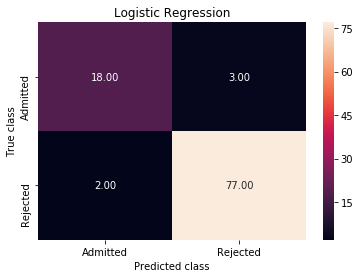

In [35]:
cy = lr.predict(x_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()

In [40]:
from sklearn.svm import SVC
svc = SVC() 
svclassifier = SVC(kernel='poly', degree=8)  
#svclassifier.fit(X_train, y_train) 
svc.fit(x_train, cy_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(cy_test, svc.predict(x_test))))
print('--------------------------------------')
print(classification_report(cy_test, svc.predict(x_test)))

Support vector machine accuracy: 0.820
--------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        80
           1       0.75      0.15      0.25        20

   micro avg       0.82      0.82      0.82       100
   macro avg       0.79      0.57      0.57       100
weighted avg       0.81      0.82      0.77       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


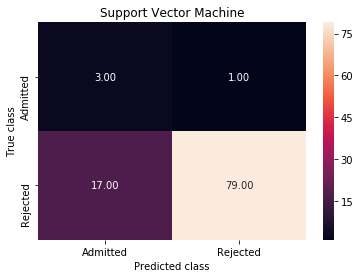

In [41]:
cy = svc.predict(x_test)
svc_confm = confusion_matrix(cy, cy_test, [1,0])
sns.heatmap(svc_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.show()